## Analysis Report
Riley Schaefer
11/20/23

### Get access to Spotify

In [1]:
import requests
import pandas as pd
import json
import base64
import urllib
import datetime
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import sqlite3
import pandas as pd
chinook = sqlite3.connect(r"C:\Users\rjs06\EMAT-Data23\chinook\chinook.db")

In [2]:
Client_ID = pd.read_csv('spotify_keys.txt')['Client_ID'].iloc[0]

In [3]:
Client_Secret = pd.read_csv('spotify_keys.txt')['Client_Secret'].iloc[0]

In [4]:
#Client_ID

In [5]:
#Client_Secret

In [6]:
client_cred = base64.b64encode(str(Client_ID + ":" + Client_Secret).encode('ascii'))

In [7]:
#client_cred

In [8]:
headers = {"Authorization": "Basic {}".format(client_cred.decode("ascii"))}

In [9]:
#headers

In [10]:
payload = {"grant_type" : "client_credentials"}
url = "https://accounts.spotify.com/api/token"

In [11]:
session_key_responce = requests.post(url = url, data = payload, headers = headers)

In [12]:
session_key_responce.status_code

200

In [13]:
#session_key_responce.json()

In [14]:
session_header_key = session_key_responce.json()

In [15]:
key = session_header_key['access_token']

In [16]:
session_headers = {"Authorization": "Bearer {}".format(key)}

In [17]:
#session_headers

***
## Spotify session is loaded, now define endpoints
***

- Divide by Ed Sheeran 
- Flood by They Might Be Giants

I Choose these albums because I have always liked Ed Sheeran and the Flood album has some of the funnest fastest songs that I know of.


### "Divide" album
***
I am choosing dancibility and energy because I like the energy with the music and I like dancing to some of them.

In [18]:
divide_ID = '3T4tUhGYeRNVUGevb0wThu'

In [19]:
divide_album_url = 'https://api.spotify.com/v1/albums/{}/tracks'.format(divide_ID)

In [20]:
divide_responce = requests.get(url = divide_album_url, headers = session_headers)
divide_responce.status_code

200

In [21]:
divide_data = json.loads(divide_responce.text)
divide_data.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

#### Testing

In [22]:
divide_data['items'][0].keys()

dict_keys(['artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_urls', 'href', 'id', 'is_local', 'name', 'preview_url', 'track_number', 'type', 'uri'])

#### Audio Features

In [23]:
divide_df = pd.DataFrame(divide_data['items'])

In [24]:
divide_features_url = 'https://api.spotify.com/v1/audio-features?ids={}'.format(','.join(list(divide_df['id'])))
divide_features_url

'https://api.spotify.com/v1/audio-features?ids=7oolFzHipTMg2nL7shhdz2,6PCUP3dWmTjcTtXY02oFdT,51ChrwmUPDJvedPQnIU8Ls,7qiZfU4dY1lWllzX7mPBI3,0tgVpDi06FyKpA1z0VMD4v,0afhq8XCExXpqazXczTSve,2RttW7RAu5nOAfq6YFvApB,5HDPtsnyb3maFmPL8LLUTG,2dfHh7ECGxfNqZTQno09Vk,2pJZ1v8HezrAoZ0Fhzby92,6PJ8FF6UR8FZXfEvpHkIVN,4VuS959DSpr82t3qBqCrWG,3Lfiu5sZ4M4B6JaKMBc0FU,6SznMYPQJHzr3IwsAHLId2,35QZaWQRkmnAVqBF1TLCxQ,6TIU9Ehmi6dMzZK73Ym4yj'

In [25]:
divide_features_response = requests.get(url = divide_features_url, headers = session_headers)
divide_features_response.status_code

200

In [26]:
divide_features = divide_features_response.json()

#### Testing

In [27]:
divide_features.keys()

dict_keys(['audio_features'])

In [28]:
divide_features['audio_features'][0].keys()

dict_keys(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])

In [29]:
divide_features_df = pd.DataFrame(divide_features['audio_features'])
divide_features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.640,0.812,8,-5.647,0,0.0834,0.0860,0.000000,0.0509,0.914,86.013,audio_features,7oolFzHipTMg2nL7shhdz2,spotify:track:7oolFzHipTMg2nL7shhdz2,https://api.spotify.com/v1/tracks/7oolFzHipTMg...,https://api.spotify.com/v1/audio-analysis/7ool...,227427,4
1,0.461,0.834,2,-4.868,1,0.0989,0.0232,0.000011,0.1400,0.471,135.007,audio_features,6PCUP3dWmTjcTtXY02oFdT,spotify:track:6PCUP3dWmTjcTtXY02oFdT,https://api.spotify.com/v1/tracks/6PCUP3dWmTjc...,https://api.spotify.com/v1/audio-analysis/6PCU...,261154,4
2,0.761,0.386,4,-6.158,1,0.0399,0.3550,0.000000,0.0953,0.526,134.943,audio_features,51ChrwmUPDJvedPQnIU8Ls,spotify:track:51ChrwmUPDJvedPQnIU8Ls,https://api.spotify.com/v1/tracks/51ChrwmUPDJv...,https://api.spotify.com/v1/audio-analysis/51Ch...,238440,3
3,0.825,0.652,1,-3.183,0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,audio_features,7qiZfU4dY1lWllzX7mPBI3,spotify:track:7qiZfU4dY1lWllzX7mPBI3,https://api.spotify.com/v1/tracks/7qiZfU4dY1lW...,https://api.spotify.com/v1/audio-analysis/7qiZ...,233713,4
4,0.599,0.448,8,-6.312,1,0.0232,0.1630,0.000000,0.1060,0.168,95.050,audio_features,0tgVpDi06FyKpA1z0VMD4v,spotify:track:0tgVpDi06FyKpA1z0VMD4v,https://api.spotify.com/v1/tracks/0tgVpDi06FyK...,https://api.spotify.com/v1/audio-analysis/0tgV...,263400,3



### "Flood" album
***
I am choosing dancibility and energy because those are the ones I picked for the last album.

In [30]:
flood_ID = '7FwAtuhhWivxvK4aPgyyUD'

In [31]:
flood_album_url = 'https://api.spotify.com/v1/albums/{}/tracks'.format(flood_ID)

In [32]:
flood_responce = requests.get(url = flood_album_url, headers = session_headers)
flood_responce.status_code

200

In [33]:
flood_data = json.loads(flood_responce.text)
flood_data.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

#### Testing

In [34]:
flood_data['items'][0].keys()

dict_keys(['artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_urls', 'href', 'id', 'is_local', 'name', 'preview_url', 'track_number', 'type', 'uri'])

#### Audio Features

In [35]:
flood_df = pd.DataFrame(flood_data['items'])

In [36]:
flood_features_url = 'https://api.spotify.com/v1/audio-features?ids={}'.format(','.join(list(flood_df['id'])))
flood_features_url

'https://api.spotify.com/v1/audio-features?ids=12l8e8JfVOgX7jQewjyNbU,6pmuu4qSz2WrtGkBjUfyuz,2kVSOg4uN0TNQ18L0NxUJ1,63vL5oxWrlvaJ0ayNaQnbX,0nKGeWn6Y4VEbRdSRJ3Y6P,6hNrg9cIjyWuklYGWIduy5,1WFCIkoc4PaN7L7SmiI85i,3BipmSxrqzUViKV3nLNCV5,3MQ2v8wNLG8TnKxZtPecao,638q39gPCdekT59LnjD4Ob,1yaq30bwwALbJfIYVBIwj4,3ZpapZEZgcT8tdMuQnEMPk,1xdxGBQw0RctB6mRaR4mDl,3kXHsKV1WBrpZbknSEcCa9,6Jok0WfJ1xTKdhyNQ15CIH,3Kmjjksjt9LXBapg8442NU,3VOrUgVDqhY20TahZMK90H,10F47eaBAie50PZe5b8H4h,7gqu3xOxeQJF1MmERBuMOw'

In [37]:
flood_features_response = requests.get(url = flood_features_url, headers = session_headers)
flood_features_response.status_code

200

In [38]:
flood_features = flood_features_response.json()

#### Testing

In [39]:
flood_features.keys()

dict_keys(['audio_features'])

In [40]:
flood_features['audio_features'][0].keys()

dict_keys(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])

In [41]:
flood_features_df = pd.DataFrame(flood_features['audio_features'])
flood_features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.490,0.154,9,-17.771,1,0.0461,0.95100,0.000003,0.290,0.783,107.178,audio_features,12l8e8JfVOgX7jQewjyNbU,spotify:track:12l8e8JfVOgX7jQewjyNbU,https://api.spotify.com/v1/tracks/12l8e8JfVOgX...,https://api.spotify.com/v1/audio-analysis/12l8...,27133,1
1,0.610,0.819,8,-8.323,1,0.0666,0.00381,0.000008,0.285,0.454,100.057,audio_features,6pmuu4qSz2WrtGkBjUfyuz,spotify:track:6pmuu4qSz2WrtGkBjUfyuz,https://api.spotify.com/v1/tracks/6pmuu4qSz2Wr...,https://api.spotify.com/v1/audio-analysis/6pmu...,198920,4
2,0.687,0.742,7,-10.197,1,0.0537,0.28100,0.000001,0.340,0.580,108.321,audio_features,2kVSOg4uN0TNQ18L0NxUJ1,spotify:track:2kVSOg4uN0TNQ18L0NxUJ1,https://api.spotify.com/v1/tracks/2kVSOg4uN0TN...,https://api.spotify.com/v1/audio-analysis/2kVS...,166667,4
3,0.688,0.748,5,-9.390,0,0.0377,0.08010,0.004530,0.136,0.892,114.144,audio_features,63vL5oxWrlvaJ0ayNaQnbX,spotify:track:63vL5oxWrlvaJ0ayNaQnbX,https://api.spotify.com/v1/tracks/63vL5oxWrlva...,https://api.spotify.com/v1/audio-analysis/63vL...,153813,4
4,0.723,0.358,4,-12.406,1,0.0312,0.85300,0.000000,0.108,0.866,82.723,audio_features,0nKGeWn6Y4VEbRdSRJ3Y6P,spotify:track:0nKGeWn6Y4VEbRdSRJ3Y6P,https://api.spotify.com/v1/tracks/0nKGeWn6Y4VE...,https://api.spotify.com/v1/audio-analysis/0nKG...,178733,4



### Histograms
***

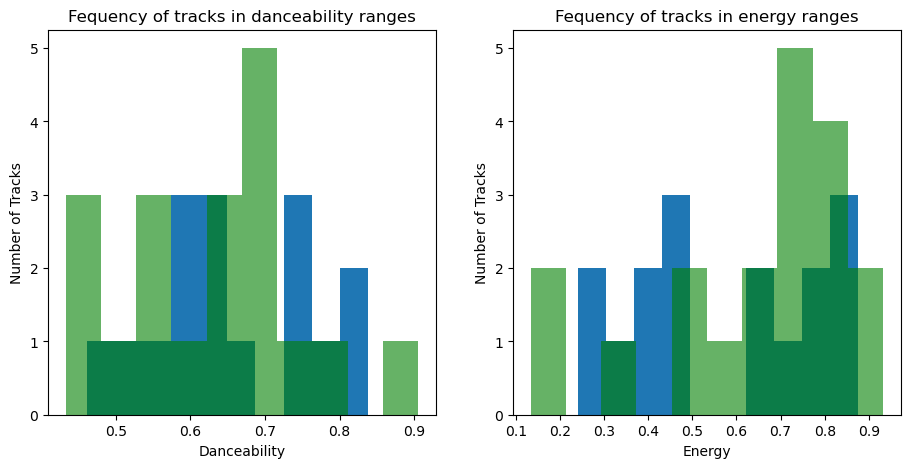

In [102]:
fig1, ax1 = plt.subplots(1, 2, figsize = (11, 5))
ax1[0].hist(divide_features_df['danceability'],
           label = 'Divide')
ax1[1].hist(divide_features_df['energy'],
           label = 'Divide')
ax1[0].hist(flood_features_df['danceability'],
           alpha = 0.6,
           label = "Flood",
           color = 'green')
ax1[1].hist(flood_features_df['energy'],
           alpha = 0.6,
           label = 'Flood',
           color = 'green')
ax1[0].set_xlabel('Danceability')
ax1[1].set_xlabel('Energy')
ax1[0].set_ylabel('Number of Tracks')
ax1[1].set_ylabel('Number of Tracks')
ax1[0].set_title('Fequency of tracks in danceability ranges')
ax1[1].set_title('Fequency of tracks in energy ranges')
plt.show()

#### Conclusions
As you can see from the histograms, the Flood has more tracks with a higher energy than Divide, but Divide has more tracks with a high danceability than Flood.


### Scatter Plots
***

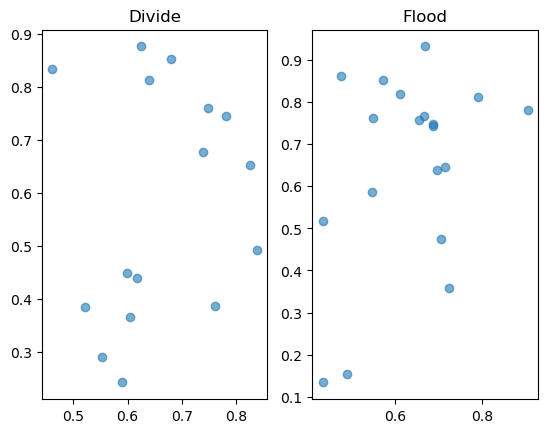

In [90]:
fig2, ax2 = plt.subplots(1, 2)
ax2[0].scatter(x=divide_features_df['danceability'], 
            y=divide_features_df['energy'],
            label = 'Divide',
            alpha = 0.6)
ax2[1].scatter(x=flood_features_df['danceability'], 
            y=flood_features_df['energy'],
            alpha = 0.6)
ax2[0].set_title('Divide')
ax2[1].set_title('Flood')
plt.show()

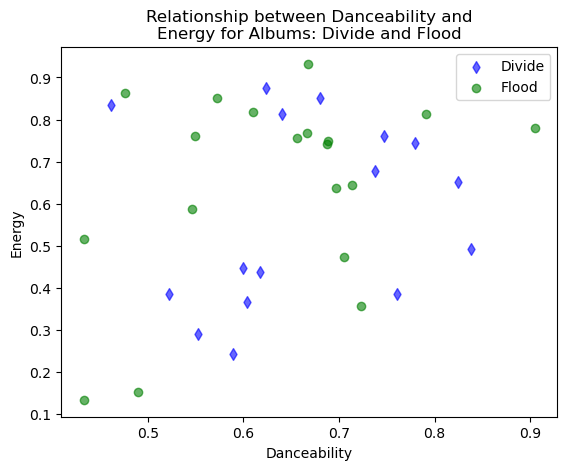

In [95]:
fig2, ax2 = plt.subplots()
ax2.scatter(x=divide_features_df['danceability'], 
            y=divide_features_df['energy'],
            label = 'Divide',
            color = 'blue',
            marker = 'd',
            alpha = 0.6)
ax2.scatter(x=flood_features_df['danceability'], 
            y=flood_features_df['energy'],
            label = 'Flood',
            color = 'green',
            alpha = 0.6)
ax2.set_title('Relationship between Danceability and\nEnergy for Albums: Divide and Flood')
ax2.set_xlabel('Danceability')
ax2.set_ylabel('Energy')
ax2.legend()
plt.show()


### Box Plot
I chose to work with Danceability
***

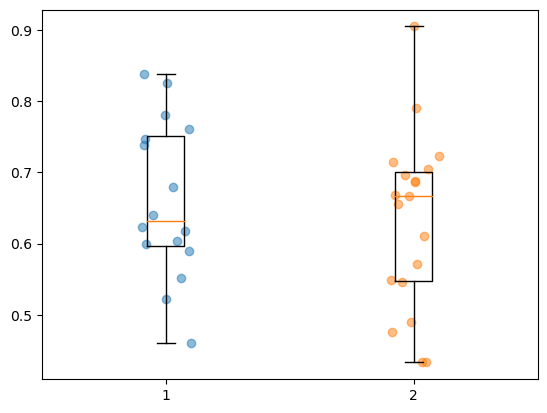

In [98]:
div_dance = divide_features_df['danceability']
flood_dance = flood_features_df['danceability']

divide_xs = [1]*len(div_dance)
flood_xs = [2]*len(flood_dance)
divide_x_jitter = np.random.uniform(-0.10, 0.10, len(divide_xs))
flood_x_jitter = np.random.uniform(-0.10, 0.10, len(flood_xs))


fig3, ax3 = plt.subplots()
ax3.boxplot(div_dance, positions = [1])
ax3.boxplot(flood_dance, positions = [2])
ax3.scatter(divide_xs + divide_x_jitter, div_dance, alpha = 0.5)
ax3.scatter(flood_xs + flood_x_jitter, flood_dance, alpha = 0.5)

plt.show()